## **Chapter 4: CNN**
### **Ex1: Digits MNIST**
- Cho dữ liệu mnist chứa 70.000 hình ảnh là các số từ 0-9.
- Chia dữ liệu thành 2 bộ là train (60.000 hình) và test (10.000 hình ảnh)
- Áp dụng CNN để nhận biết hình ảnh số là số mấy.
- Tính toán số lượng các tham số từ summary của mô hình.
- Chú ý: nên dùng EarlyStopping, ModelCheckpoint để lưu lại model sau các lần thực thi để tránh khi bị ngắt đột ngột phải thực hiện lại từ đầu

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Model, Sequential
from tensorflow.keras.layers import Dense, Input

from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten
from tensorflow.keras.layers import MaxPooling2D, Dropout
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
%cd '/content/gdrive/My Drive/LDS8_K275_ONLINE_DinhVietTrung'

Mounted at /content/gdrive
/content/gdrive/My Drive/LDS8_K275_ONLINE_DinhVietTrung


In [ ]:
print(tf.__version__)
print(keras.__version__)

2.8.0
2.8.0


In [ ]:
#download mnist data and split into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
test_images = X_test[:5]

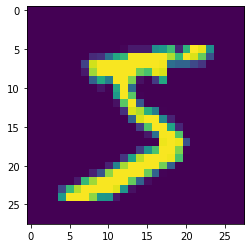

In [ ]:
#plot the first image in the dataset
plt.imshow(X_train[0])

In [ ]:
#check image shape
X_train[0].shape

(28, 28)

In [ ]:
#reshape data to fit model
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [ ]:
#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
#create model
model = Sequential()
#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
# Tao va du doan tiep tuc voi ANN
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
# output
model.add(Dense(10, activation='softmax'))

In [ ]:
#compile model using accuracy as a measure of model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = [EarlyStopping(monitor='val_loss', patience=20),
              ModelCheckpoint('Chapter_4_CNN/Exercise/model_mnist_checkpoint_new.h5', save_best_only=True)]

In [ ]:
#train model
model.fit(X_train, y_train,validation_data=(X_test, y_test),
          epochs=100,
          batch_size=256,
          callbacks=callbacks
)

Epoch 1/100
235/235 [==============================] - 16s 66ms/step - loss: 1.3488 - accuracy: 0.8066 - val_loss: 0.0982 - val_accuracy: 0.9704
Epoch 2/100
235/235 [==============================] - 15s 65ms/step - loss: 0.1742 - accuracy: 0.9472 - val_loss: 0.0580 - val_accuracy: 0.9817
Epoch 3/100
235/235 [==============================] - 15s 64ms/step - loss: 0.1240 - accuracy: 0.9632 - val_loss: 0.0500 - val_accuracy: 0.9834
Epoch 4/100
235/235 [==============================] - 15s 64ms/step - loss: 0.1016 - accuracy: 0.9691 - val_loss: 0.0400 - val_accuracy: 0.9864
Epoch 5/100
235/235 [==============================] - 15s 63ms/step - loss: 0.0888 - accuracy: 0.9737 - val_loss: 0.0428 - val_accuracy: 0.9860
Epoch 6/100
235/235 [==============================] - 16s 67ms/step - loss: 0.0787 - accuracy: 0.9767 - val_loss: 0.0337 - val_accuracy: 0.9886
Epoch 7/100
235/235 [==============================] - 15s 66ms/step - loss: 0.0682 - accuracy: 0.9788 - val_loss: 0.0308 - val_ac

In [ ]:
# Creates a HDF5 file 'my_model.h5'
model.save('Chapter_4_CNN/Exercise/model/my_mnist_model_CNN_new.h5')
print("save!!!")

save!!!


In [ ]:
#show predictions for the first 5 images in the test set
result = model.predict(X_test[:5])
result.round()

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
#show actual results for the first 5 images in the test set
y_test[:5]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

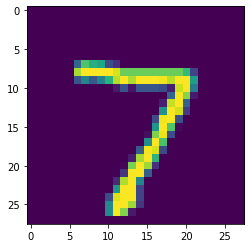

In [ ]:
plt.imshow(test_images[0])

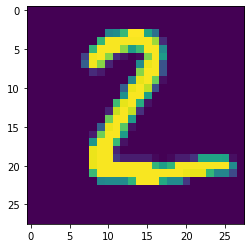

In [ ]:
plt.imshow(test_images[1])

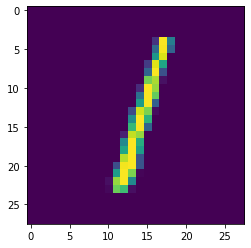

In [ ]:
plt.imshow(test_images[2])

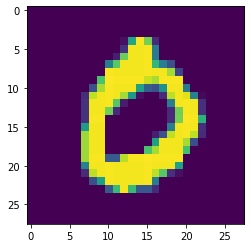

In [ ]:
plt.imshow(test_images[3])

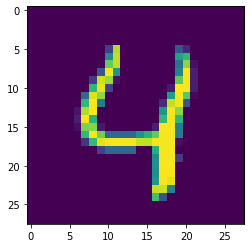

In [ ]:
plt.imshow(test_images[4])

In [ ]:
from tensorflow.keras.models import load_model
classifier = load_model('Chapter_4_CNN/Exercise/model/my_mnist_model_CNN_new.h5')

In [ ]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 128)         0

In [ ]:
'''
layer input: param = 0
conv2d_2 = (3 x 3 x 1+1)*64 = 640
max_pooling2d_1 = 0
dropout_1 = 0
conv2d_3 = (3 x 3 x 64 + 1) * 128 = 73568
max_pooling2d_2 = 0
dropout_2 = 0
flatten_1 = 0
dense_1 = 128 x 3200 + 128 = 409728
dropout_3 = 0
dense_2 = 10 x 128 + 10 = 1290

input layer (None, w = 28, h = 28, f =1), Fc= 64, k=3, s=1
conv2d_2:
ow = (w-f+2.p)/s + 1 = (28-3+2.0)/1 + 1 = 26
oh = (h-f+2.p)/s + 1 = (28-3+2.0)/1 + 1 = 26
f_c = 64
=> (None, 26, 26, 64)
max_pooling = (w/2, h/2, 64) = (None, 26/2, 26/2, 64)
dropout (none, 13, 13, 64)


conv2d_3:
ow = (w-f+2.p)/s + 1 = (13-3+2.0)/1 + 1 = 11
oh = (h-f+2.p)/s + 1 = (13-3+2.0)/1 + 1 = 11
f_c = 128 -=> (None, 11, 11, 128)
max_pooling = (w/2, h/2, 64) = (None, 11/2, 11/2, 128)
dropout (none, 5, 5, 128)
flaten 1 = (w * h * f_c) 
'''

'\nlayer input: param = 0\nconv2d_2 = (3 x 3 x 1+1)*64 = 640\nmax_pooling2d_1 = 0\ndropout_1 = 0\nconv2d_3 = (3 x 3 x 64 + 1) * 128 = 73568\nmax_pooling2d_2 = 0\ndropout_2 = 0\nflatten_1 = 0\ndense_1 = 128 x 3200 + 128 = 409728\ndropout_3 = 0\ndense_2 = 10 x 128 + 10 = 1290\n\ninput layer (None, w = 28, h = 28, f =1), Fc= 64, k=3, s=1\nconv2d_2:\now = (w-f+2.p)/s + 1 = (28-3+2.0)/1 + 1 = 26\noh = (h-f+2.p)/s + 1 = (28-3+2.0)/1 + 1 = 26\nf_c = 64\n=> (None, 26, 26, 64)\nmax_pooling = (w/2, h/2, 64) = (None, 26/2, 26/2, 64)\ndropout (none, 13, 13, 64)\n\n\nconv2d_3:\now = (w-f+2.p)/s + 1 = (13-3+2.0)/1 + 1 = 11\noh = (h-f+2.p)/s + 1 = (13-3+2.0)/1 + 1 = 11\nf_c = 128 -=> (None, 11, 11, 128)\nmax_pooling = (w/2, h/2, 64) = (None, 11/2, 11/2, 128)\ndropout (none, 5, 5, 128)\nflaten 1 = (w * h * f_c) \n'